In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Loading

In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(7).T

,0,1,2,3,4,5,6
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK
gender,Female,Male,Male,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No
Dependents,No,No,No,No,No,No,Yes
tenure,1,34,2,45,2,8,22
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

*convert datatype for 'TotalCharges'*

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


*Summary statistics*

In [6]:
df['customerID'].duplicated().sum()

0

*Check for duplicated customers*

In [7]:
print((df.isna()).sum())  

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


*Check for missing values*

In [8]:
df[df['TotalCharges'].isna()==True]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [10]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

* droping rows with 0 value in tenure & TotalCharges

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
def senior_c(i):
    if i == 1:
      return 'Yes'
    else:
      return 'No'
df['SeniorCitizen']=df['SeniorCitizen'].apply(senior_c)

*Convert 'SeniorCitizen' to Yes/No*

In [14]:
df.drop(['customerID'], axis=1, inplace=True, errors='ignore')

*Drop unnecessary column*

In [16]:
x=[(df.select_dtypes(include=['object']))]
for i in x:
    print (i.nunique())

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64


*Unique values in categorical columns*

*Ensuring data consistency*

In [17]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in gender: ['Female' 'Male']
Unique values in SeniorCitizen: ['No' 'Yes']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Chu

*Check for inconsistent categorical values*

In [19]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

*Display final dataset info*

# EDA & Visualizations

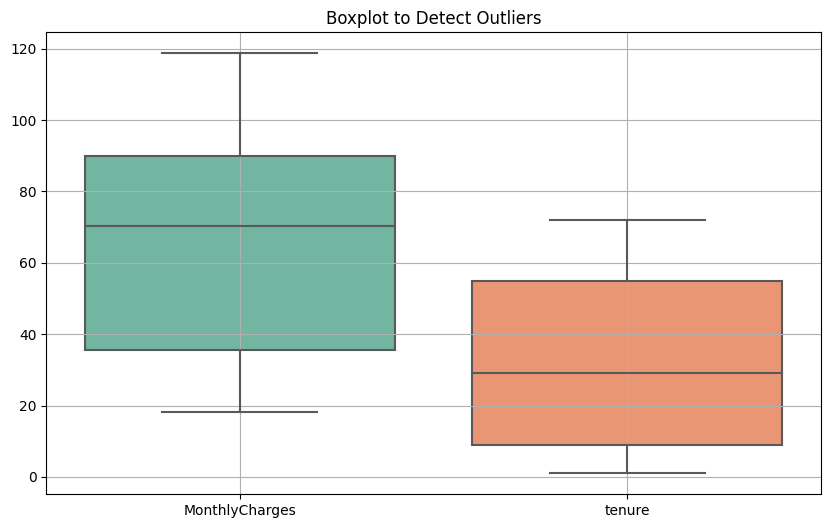

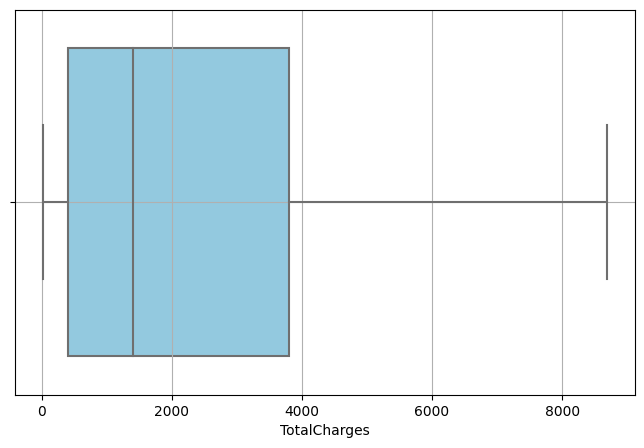

In [21]:
score_columns=['MonthlyCharges','tenure']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[score_columns], palette="Set2")
plt.title("Boxplot to Detect Outliers")
plt.grid()
plt.show()
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TotalCharges'], color="skyblue")
plt.xlabel("TotalCharges")
plt.grid()
plt.show()

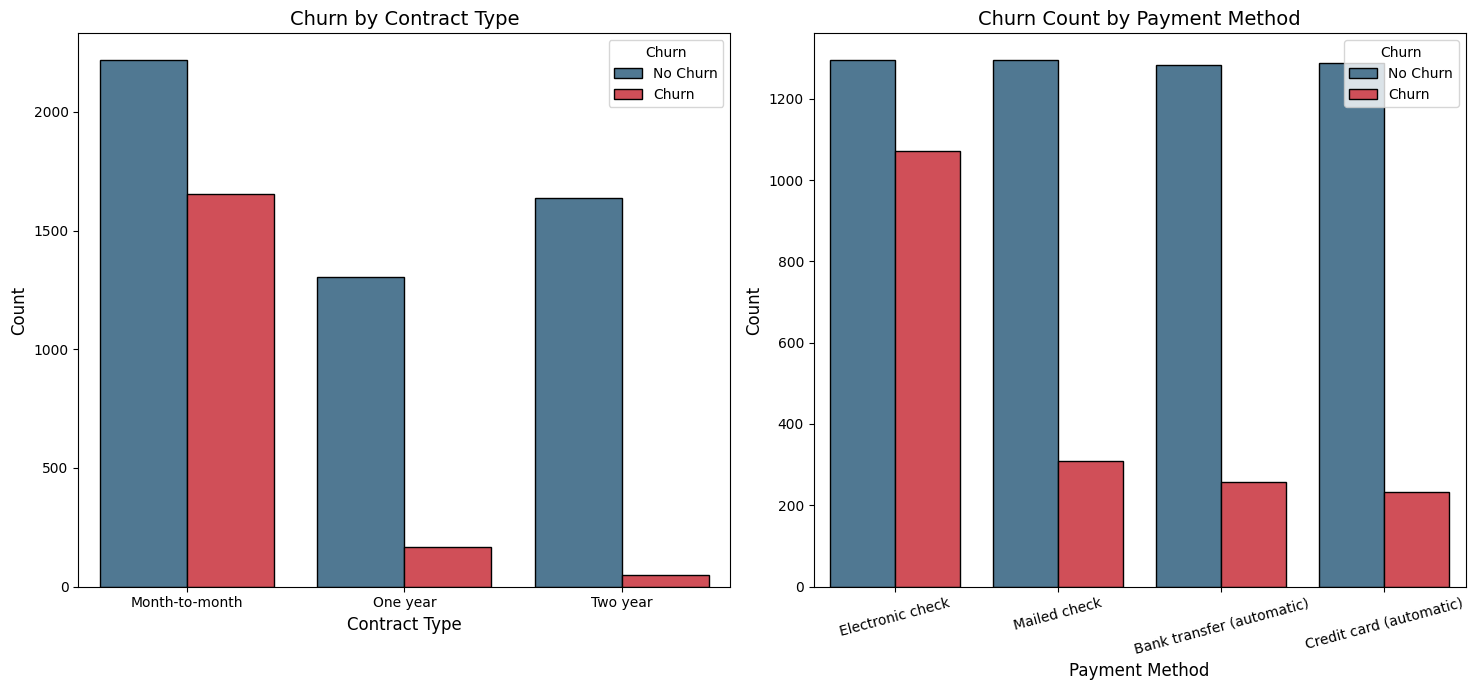

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # Two plots side by side
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0], 
              palette={'Yes': '#E63946', 'No': '#457B9D'}, edgecolor='black')
axes[0].set_title("Churn by Contract Type", fontsize=14)
axes[0].set_xlabel("Contract Type", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(title="Churn", labels=["No Churn", "Churn"])
sns.countplot(x="PaymentMethod", hue="Churn", data=df, ax=axes[1], 
              palette={'Yes': '#E63946', 'No': '#457B9D'}, edgecolor='black')
axes[1].set_title("Churn Count by Payment Method", fontsize=14)
axes[1].set_xlabel("Payment Method", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].tick_params(axis='x', rotation=15)
axes[1].legend(title="Churn", labels=["No Churn", "Churn"])
plt.tight_layout() 
plt.show()

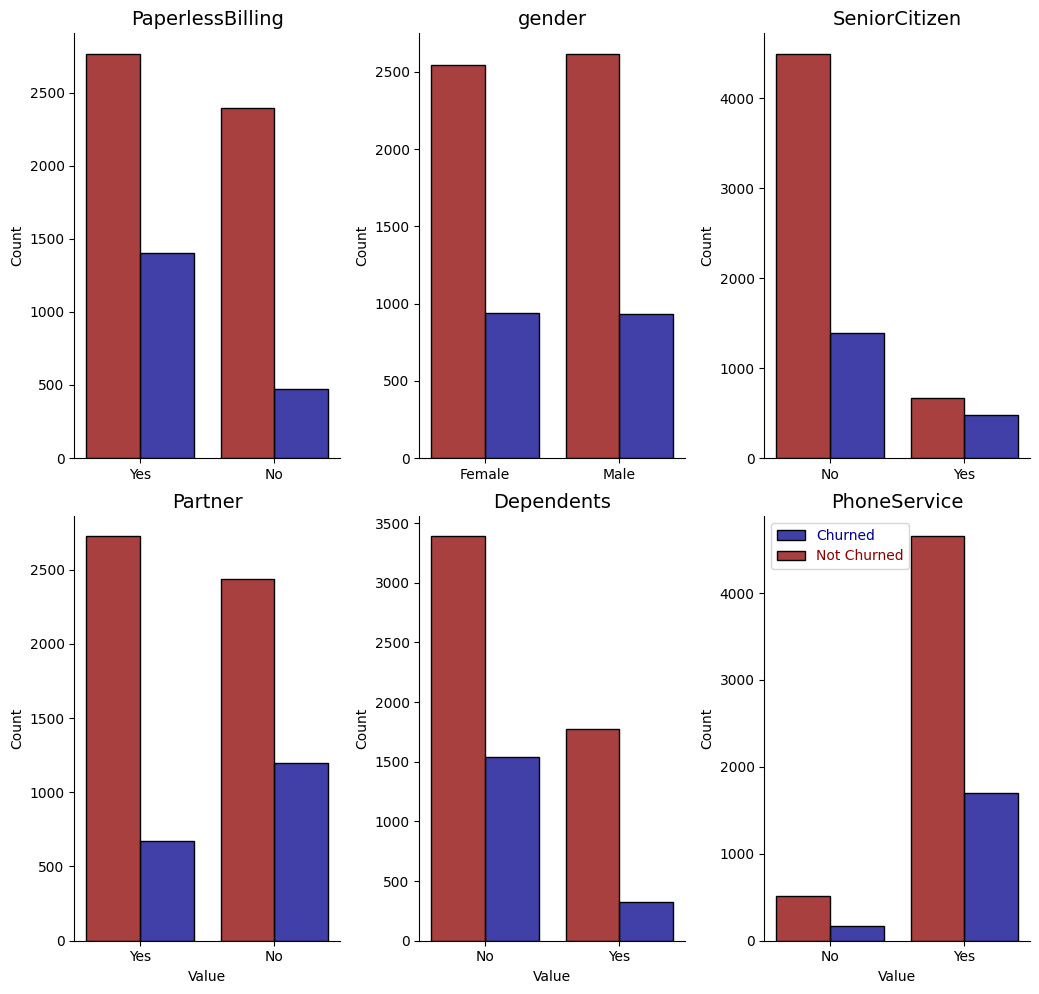

In [36]:
col = ['PaperlessBilling', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService']
df_melted = df.melt(id_vars=['Churn'], value_vars=col, var_name='Feature', value_name='Value')
df_melted['Churn'] = df_melted['Churn'].astype(str)
g = sns.FacetGrid(df_melted, col='Feature', col_wrap=3, height=5, aspect=0.7, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x='Value', hue='Churn', multiple='dodge', palette={'Yes': 'darkblue', 'No': 'darkred'}, shrink=0.8)
g.set_titles(col_template="{col_name}", size=14)
plt.legend(['Churned', 'Not Churned'], labelcolor=['darkblue', 'darkred'])
plt.show()

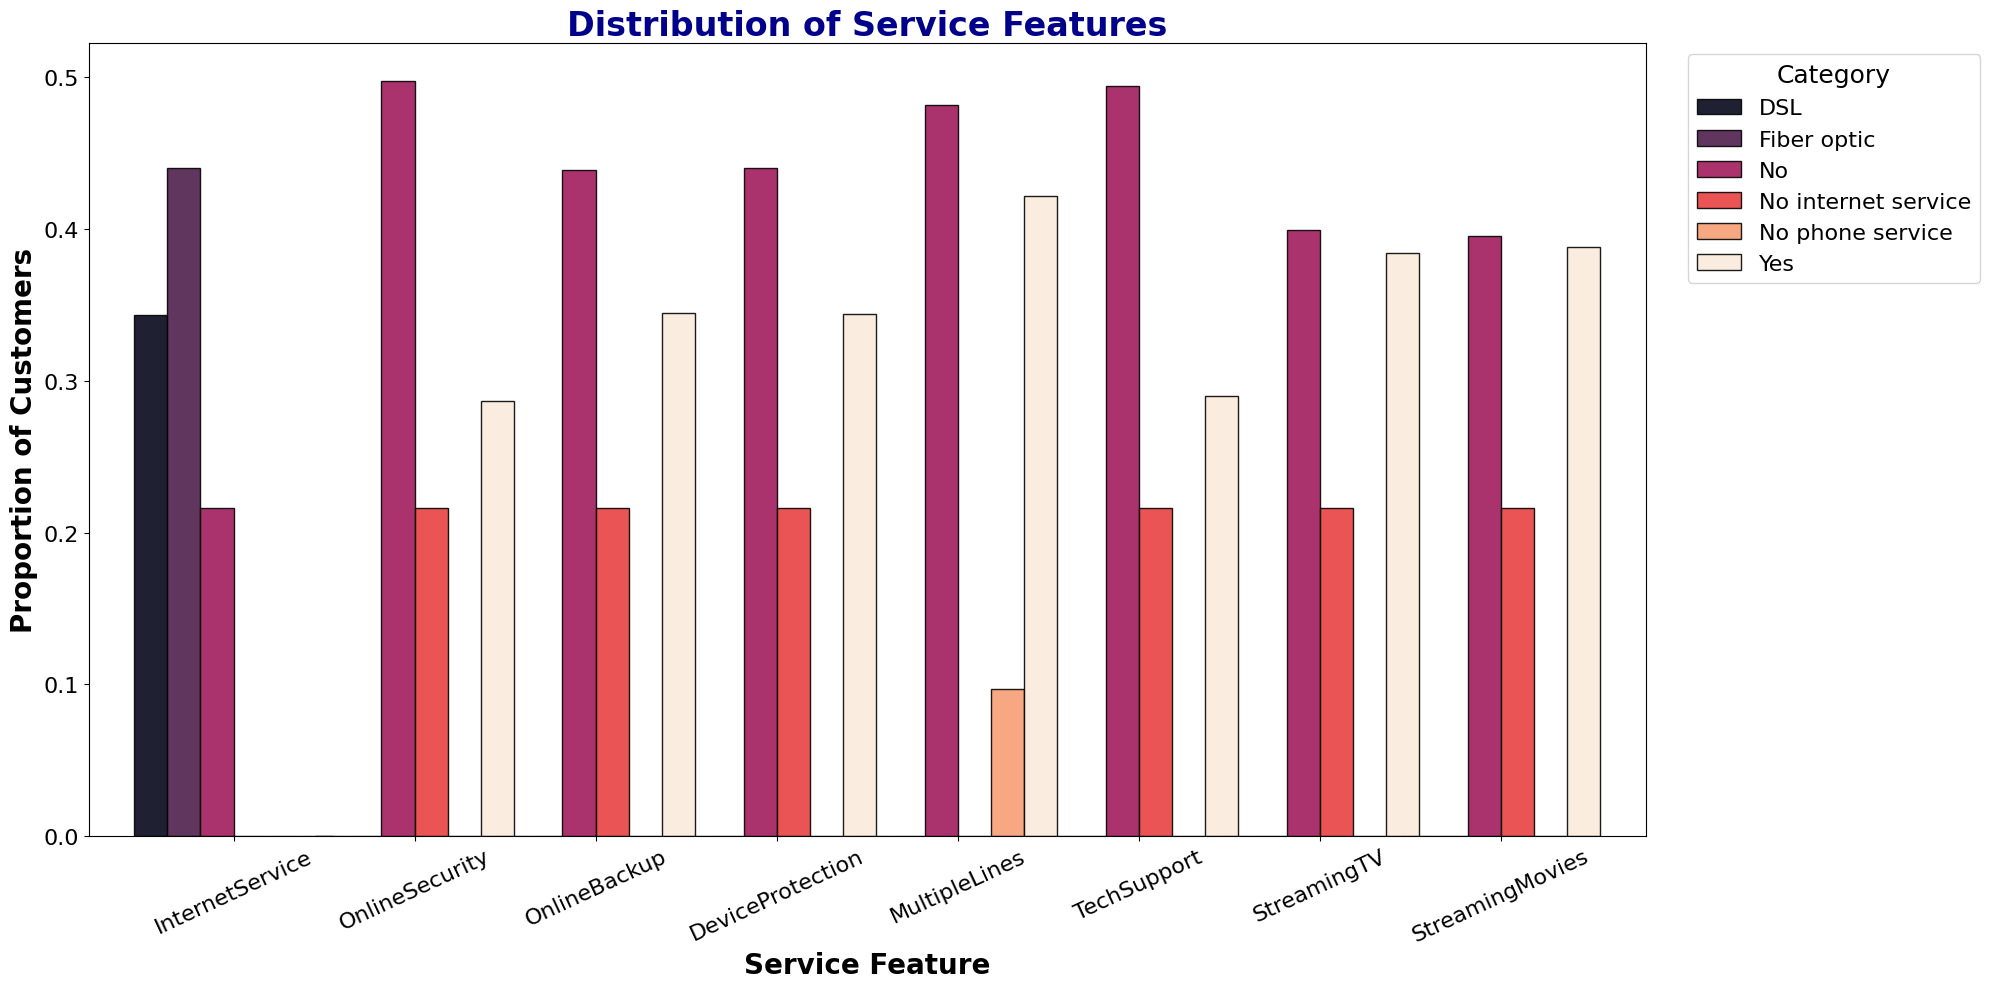

In [67]:
cat_cols = [ 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'MultipleLines' ,'TechSupport', 
            'StreamingTV', 'StreamingMovies']

cat_counts = {col: df[col].value_counts(normalize=True) for col in cat_cols}
cat_df = pd.DataFrame(cat_counts).T  

fig, ax = plt.subplots(figsize=(20, 10))  

cat_df.plot(kind='bar', stacked=False, colormap='rocket', edgecolor='black', alpha=0.89, width=1.1, ax=ax)


ax.set_title("Distribution of Service Features", fontsize=24, fontweight='bold', color='darkblue')
ax.set_xlabel("Service Feature", fontsize=20, fontweight='bold')
ax.set_ylabel("Proportion of Customers", fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(title="Category", fontsize=16, title_fontsize=18, loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

In [33]:
tcol = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig = make_subplots(
    rows=2, cols=2, 
    subplot_titles=[f"Churn vs {tcol[0]}", f"Churn vs {tcol[1]}", f"Churn vs {tcol[2]}"], 
    specs=[[{"type": "box"}, {"type": "box"}], [{"colspan": 2}, None]] 
)
fig.add_trace(go.Box(y=df['tenure'], x=df['Churn'], name="tenure", boxmean=True), row=1, col=1)
fig.add_trace(go.Box(y=df['MonthlyCharges'], x=df['Churn'], name="MonthlyCharges", boxmean=True), row=1, col=2)
fig.add_trace(go.Box(y=df['TotalCharges'], x=df['Churn'], name="TotalCharges", boxmean=True), row=2, col=1)
fig.update_layout(
    title_text="Churn Distribution Across Key Features",
    showlegend=False,
    height=800,
    width=800
)
fig.show(renderer='iframe')